# A/B-тест для интернет магазина 

**Цель исследования:**
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Описание данных:**

Данные для первой части
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
**orders**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**visitors**
- date — дата;
-  group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**План работы**:
**Часть 1. Приоритизация гипотез.**
* Применить фреймворк ICE для приоритизации гипотез. 
* Применить фреймворк RICE для приоритизации гипотез. 
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируем A/B-тест:
* Построим график кумулятивной выручки по группам. 
* Построим график кумулятивного среднего чека по группам. 
* Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 
* Построим график кумулятивного среднего количества заказов на посетителя по группам. 
* Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
* Построим точечный график количества заказов по пользователям. 
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
* Построим точечный график стоимостей заказов. 
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
* Примем решение по результатам теста. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

По каждому пункту сделаем выводы и предположения.

## часть

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
data.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
data['ICE']  =  round((data['Impact'] * data['Confidence']) / data['Efforts'],2)

sorted_data = data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
pd.set_option('max_colwidth', 200)
sorted_data

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [4]:
data['RICE']  =  round((data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts'], 2)

sorted_data = data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
sorted_data

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При приотизации методом ICE мы получили следующий порядок: 8, 0, 7, 6, 2, 1, 5, 3, 4.
При приотизации методом RICE мы получили: 7, 2, 0, 6, 8, 3, 1, 5, 4

После применения RICE, мы видим, что гипотеза с индексом 7 переместилась на первое место, тогда как гипотеза с индексом 8, которая была на первом месте по ICE, опустилась на пятое место. Последние 4 гипотезы в списках одинаковые, хоть и в немного отличающемся порядке. Их можно больше не учитывать. 
Фреймворк RICE включает дополнительную компоненту "Reach" (Охват), которая измеряет, скольких пользователей затронет изменение, она может значительно влиять на приоритет гипотезы. Гипотеза с индексом 7, вероятно, имеет высокий Reach, что сделало её более приоритетной в RICE


## часть

Построим график кумулятивной выручки по группам. Сначала выгрузим датасеты, ознакомимся с данными, посчитаем по группам сумму с накоплением. Проверим на дубликаты.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head(5))
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
display(orders.duplicated().sum())

visitors.duplicated().sum() 

0

0

Теперь выполним проверку, не попадают ли какие-то пользователи в обе группы. Не попадают, только А и В.

In [7]:
group_a = set(orders[orders['group'] == 'A']['visitorId'])
group_b = set(orders[orders['group'] == 'B']['visitorId'])

common_users = group_a.intersection(group_b)
print(len(common_users))

58


58 пользователей. Их можно не удалять, так как мы можем очистить только таблицу с заказами, но не с посетителями.

In [8]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В ходе ознакомления с данными обнаружила, что у дат формат object, поменяла.

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

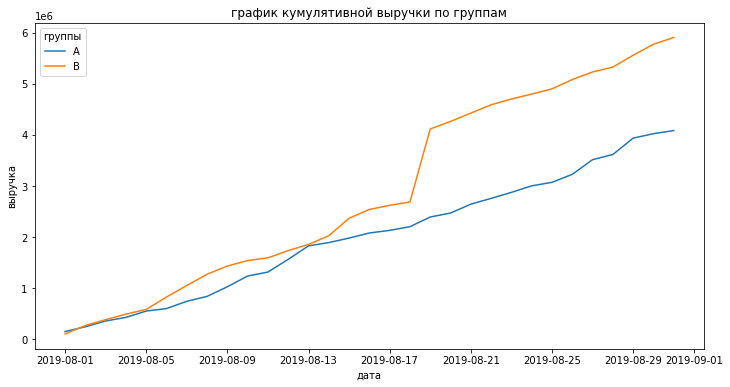

In [10]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням и по группам
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, ax = plt.subplots(figsize=(12, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('график кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.legend(title='группы')
plt.show();

Кумулятивная выручка группы В на 13 день теста начала резкий рост и значительно превысила группу А. Тенденция продожилась. Примерно на 18 день был особенно большой скачок.

Теперь построим график кумулятивного среднего чека по группам.

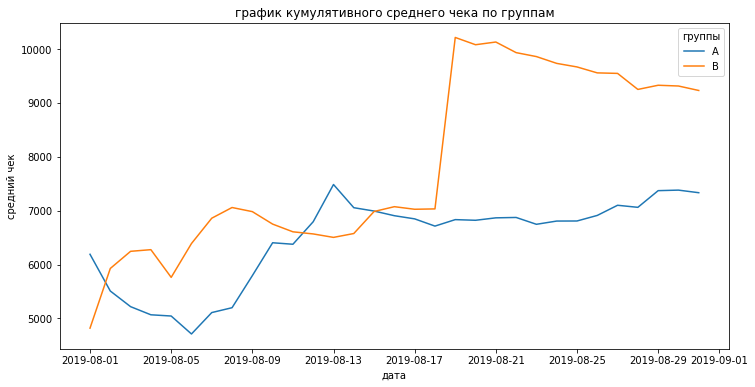

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('график кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.legend(title='группы')
plt.show();

Мы снова видим тот скачок, который был на предыдущем графике. Скорее всего это влияние аномально больших покупок. Вообще средний чек в тесте выше, чем в контроле, кроме одного интервала примерно с 11 по 14 день, где у контрольной группы наблюдался пик.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

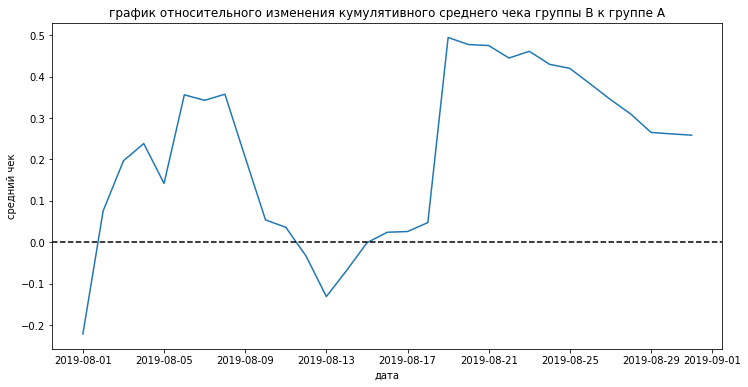

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.show();

Результаты теста значительно и резко менялись в несколько дат. Видимо, тогда были совершены аномальные заказы.

Построим график кумулятивного среднего количества заказов на посетителя по группам. 

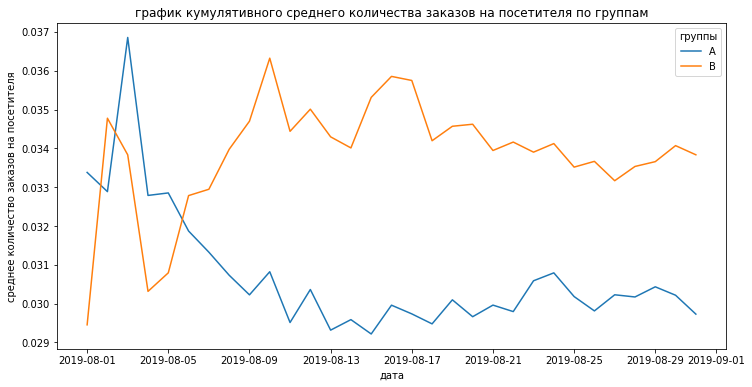

In [13]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('среднее количество заказов на посетителя')
plt.legend(title='группы')
plt.show();

В первые дни в контроле среднее количество заказов на посетителя было выше, чем в тесте, но потом тест стабильно показывал большие показатели. 

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

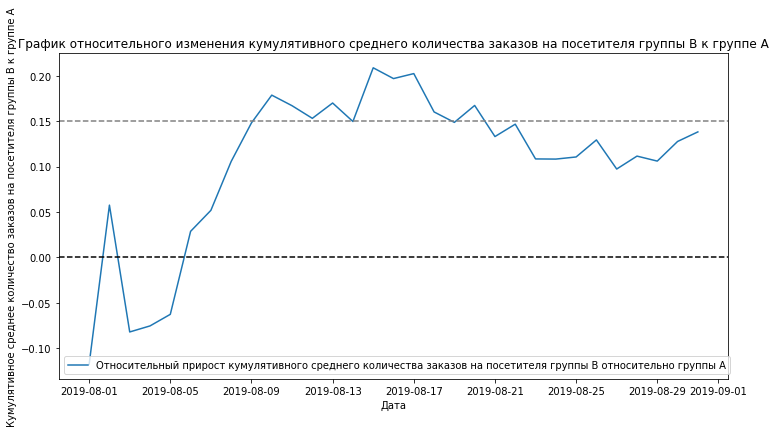

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.legend()
plt.show()

С 05.08.2019 начался резкий рост. Пик был достигнут 17го, после чего показатели немного упали и зафиксировались около прироста в 12% относительно группы A.

Теперь построим точечный график количества заказов по пользователям. А затем посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
90,95 и 99 процентили: [1. 2. 4.]


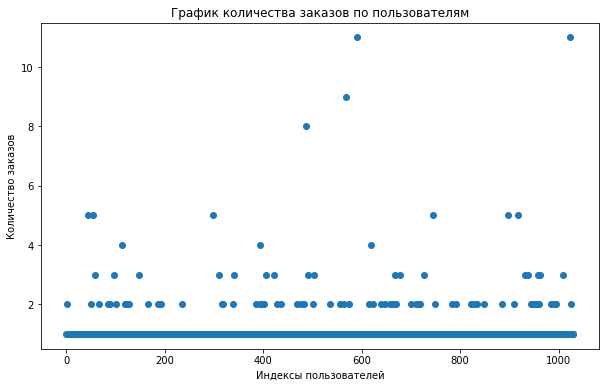

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);
plt.title('График количества заказов по пользователям')
plt.xlabel('Индексы пользователей')
plt.ylabel('Количество заказов')
print('90,95 и 99 процентили:',(np.percentile(ordersByUsers['orders'], [90, 95, 99]))) 

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырёх заказов. Сочту количество заказов больше четырёх аномальным.

Теперь также проанализируем стоимость заказов. 

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
90,95 и 99 процентили: [18168.  28000.  58233.2]


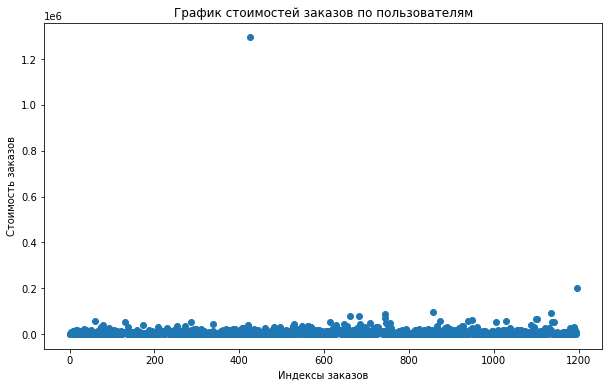

In [16]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
fig, ax = plt.subplots(figsize=(10, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']);
plt.title('График стоимостей заказов по пользователям')
plt.xlabel('Индексы заказов')
plt.ylabel('Стоимость заказов')
print('90,95 и 99 процентили:',(np.percentile(orders['revenue'], [90, 95, 99]))) 

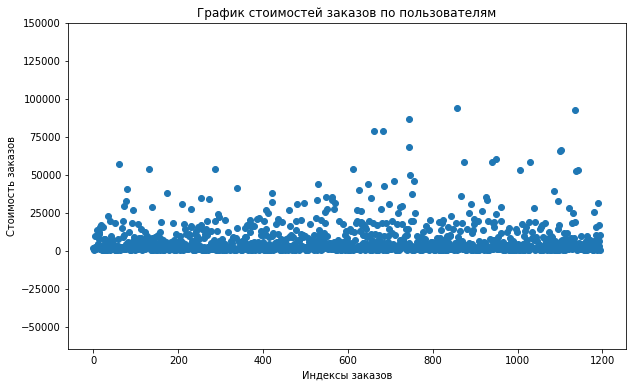

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов по пользователям')
plt.xlabel('Индексы заказов')
plt.ylabel('Стоимость заказов')

# Ограничение по оси Y
plt.ylim(top=150000)

plt.show()

Не более, чем у 5% заказов чек дороже 2 800 рублей. И не больше, чем у 1% заказов — дороже 58 233 рублей. Сочту заказы стоимостью выше 58 000 аномальными.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет

Альтернативная гипотеза: различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть

alpha = 0.05

Использую непараметрический тест Уилкоксона-Манна-Уитни, он лучше работает с выбросами.

In [18]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print()
print('p-value:', ("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])))
print()
print ('относительный прирост среднего числа заказов группы B:', ("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  visitorsPerDateA  visitorsPerDateB  
0           101217               719               713  
1           165531               619               581  
2           114248               507               509  
3           108571               717               770  
4            92428               756               707  

p-value: 0.01679

относительный прирост среднего числа заказов группы B: 0.138


P-value  меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.

Нулевая гипотеза: различий в среднем чеке заказа между группами по «сырым» данным нет

Альтернативная гипотеза: различия в среднем чеке заказа между группами по «сырым» данным есть

alpha = 0.05

Использую непараметрический тест Уилкоксона-Манна-Уитни, он лучше работает с выбросами.

In [19]:
print('p-value:', ('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])))
print('относительный прирост среднего чека заказов группы B:',('{0:.3f}'.
format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)))

p-value: 0.729
относительный прирост среднего чека заказов группы B: 0.259


P-value больше 0.05 — нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами 25.9%

Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет

Альтернативная гипотеза: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть

alpha = 0.05

По примеру в уроке я также использовала тест Уилкоксона-Манна-Уитни

In [20]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64


In [21]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', ('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])))
print('относительный прирост среднего числа заказов группы B:' , ('{0:.3f}'
                .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)))


p-value: 0.014
относительный прирост среднего числа заказов группы B: 0.153


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 14.8%.

Нулевая гипотеза: различий в среднем чеке заказа между группами по «очищенным» данным нет

Альтернативная гипотеза: различия в среднем чеке заказа между группами по «очищенным» данным есть

alpha = 0.05

Я также использовала тест Уилкоксона-Манна-Уитни

In [22]:
print( 'p-value:' ,(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
))

print('относительный прирост среднего чека заказов группы B:', (
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
))

p-value: 0.851
относительный прирост среднего чека заказов группы B: -0.006


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет, нулевую гипотезу не отвергаем.

**Вывод:**

Мы провели анализ по сырым и по очищенным данным.


* статистическая значимость различий в среднем количестве заказов на посетителя между группами.
По сырым данным P-value меньше 0.05, потому нулевую гипотезу отвергаем. Относительный прирост среднего группы B к конверсии группы A равен 13.8%. 

По очищенным данным P-value также меньше 0.05. Относительный прирост среднего группы B к конверсии группы A равен 14.8%.

* статистическая значимость различий в среднем чеке заказа между группами 
По сырым данным P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами всего 2.59%

По очищенным данным P-value также больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.

Да, данные были с аномалиями, но очистка не изменила выводы.

**Заключение**

Я считаю, что можно остановить тест и зафиксировать победу группы В. Так как несмотря на то, что средний чек не изменился, у нас есть статистически значимые изменения в количестве заказов, а значит тест был успешным.